# **Oficina 5**

Optei por importar o dataset diretamente da nuvem da AWS através do S3. Utilizei a biblioteca boto3 e utilizei o gerenciamento de segurança do dataset através de chave de segurança, configurando com aws cli

In [103]:
!pip install boto3

In [104]:
!apt-get install awscli

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
awscli is already the newest version (1.22.34-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [106]:
!aws s3 ls

2025-03-15 21:05:40 datasets-bucket-david
2025-03-11 15:41:02 meu-bucket-first-test
2025-03-11 21:16:21 sagemaker-us-east-2-593793041552


In [107]:
import os

aws_acess_key = os.getenv("AWS Access Key ID")
aws_secret_key = os.getenv("AWS Secret Access Key")
region = "us-east-1"

In [108]:
import boto3

s3 = boto3.client("s3", aws_access_key_id=aws_secret_key, aws_secret_access_key=aws_secret_key, region_name=region)

In [109]:
import pandas as pd
import io

BUCKET_NAME = 'datasets-bucket-david'
FILE_KEY = 'housing.csv'

response = s3.get_object(Bucket=BUCKET_NAME, Key=FILE_KEY)
file_content = response['Body'].read()

df = pd.read_csv(io.BytesIO(file_content))

In [110]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [112]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

<ipython-input-112-c9f555b11c0f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


In [113]:
df['total_rooms'] = df['total_rooms'].astype(int)
df['total_bedrooms'] = df['total_bedrooms'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  int64  
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 1.6+ MB


In [114]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = onehot.fit_transform(df[['ocean_proximity']])

encoded_df = pd.DataFrame(encoded_data, columns=onehot.get_feature_names_out(['ocean_proximity']))

df = pd.concat([df, encoded_df], axis=1)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880,129,322.0,126.0,8.3252,452600.0,NEAR BAY,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099,1106,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467,190,496.0,177.0,7.2574,352100.0,NEAR BAY,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274,235,558.0,219.0,5.6431,341300.0,NEAR BAY,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627,280,565.0,259.0,3.8462,342200.0,NEAR BAY,0.0,0.0,1.0,0.0


Existe uma correlação clara entre as features. Pode-se notar que à medida que a renda aumenta, o valor das casas também aumenta, tendo como teto o valor limite 500 mil no valor das casas.

Nota-se outliers também em alguns pontos, como no caso de casas com valores muito altos e rendas muito altas.

In [115]:
df = df.drop('ocean_proximity', axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880,129,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099,1106,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467,190,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274,235,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627,280,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


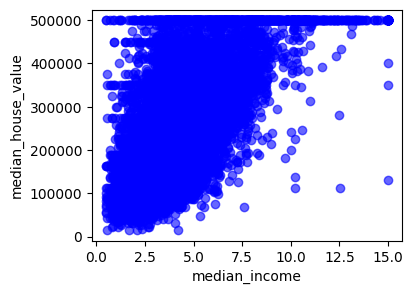

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
plt.scatter(df['median_income'], df['median_house_value'], color='blue', alpha=0.6)

plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

In [117]:
df['rooms_per_household'] = df['total_rooms'] / df['households']

In [118]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

Text(0.5, 1.0, 'Boxplot da Renda Mediana')

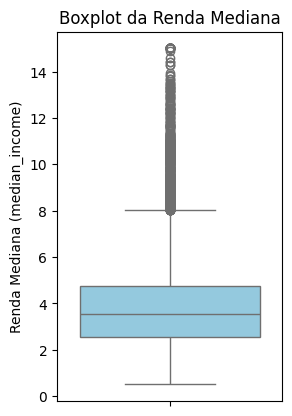

In [119]:
import seaborn as sns

plt.subplot(1, 2, 1)
sns.boxplot(y = X['median_income'], color='skyblue')
plt.ylabel("Renda Mediana (median_income)")
plt.title("Boxplot da Renda Mediana")

Text(0.5, 1.0, 'Boxplot da Valor Mediano da Casa')

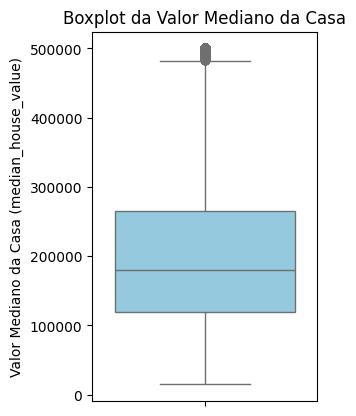

In [120]:
plt.subplot(1, 2, 1)
sns.boxplot(y = y, color='skyblue')
plt.ylabel("Valor Mediano da Casa (median_house_value)")
plt.title("Boxplot da Valor Mediano da Casa")

É possível observar que temos outliers nas duas features (Income Median e Median House Value). Para analisar se é preciso removê-los, precisamos do contexto do problema. Primeiramente, valores de renda média muito alta podem ser normais já que podemos realmente ter pessoas com rendas muito altas ou de regiões muito pobres, portanto, optei por não remover os outliers desta feature.

Os valores de income house value podem ser realistas também, já que podemos realmente ter casas com valores muito altos como como casas de luxo ou propriedades únicas. Portanto, optei também por não removê-los.

Caso fosse necessário a remoção, poderíamos utilizar o cálculo de intervalo interquartil (IQR) que é a diferença entre o 3º quartil (Q3 - 75%) e o 1º quartil (Q1 - 25%) de um conjunto de dados. Valores fora deste intervalo são considerados outliers.

Devemos separar o datasets em conjuntos de dados de treino e teste. Esta prática é eficaz antes de treinarmos o modelo para conseguirmos ter um modelo robusto que generaliza bem para dados não vistos, caso contrário poderíamos ter problemas como overfitting ou underfitting.

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [122]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household
1989,-119.79,36.73,52.0,112,28,193.0,40.0,1.9750,1.0,0.0,0.0,0.0,2.800000
256,-122.21,37.77,43.0,1017,328,836.0,277.0,2.2604,0.0,0.0,1.0,0.0,3.671480
7887,-118.04,33.87,17.0,2358,396,1387.0,364.0,6.2990,0.0,0.0,0.0,0.0,6.478022
4581,-118.28,34.06,17.0,2518,1196,3051.0,1000.0,1.7199,0.0,0.0,0.0,0.0,2.518000
1993,-119.81,36.73,50.0,772,194,606.0,167.0,2.2206,1.0,0.0,0.0,0.0,4.622754


In [123]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

Primeiramente treinamos o modelo com o algoritmo de Regressão Linear com todas as features. Posteriormente, avaliamos seu desempenho utilizando as métricas de R2_Score, MAE e RMSE.

In [124]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [125]:
y_pred = lr.predict(X_test)

In [126]:
from sklearn.metrics import r2_score

r2_lr1 = r2_score(y_test, y_pred)

print(r2_lr1)

0.6437064683814464


In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae_lr}")
print(f"RMSE: {rmse_lr}")

MAE: 49549.73664040253
RMSE: 68921.95925153674


Desta vez, selecionamos as features 'median_income', 'housing_median_age' e 'rooms_per_household' e treinamos novamente com Regressão Linear. Notou-se que os scores pioraram com relação ao modelo treinado com todas as features. O R2 foi menor e o MAE e RMSE foram maiores, o que indica que o modelo de regressão piorou.

In [128]:
features_selected = df[['median_income', 'housing_median_age', 'rooms_per_household']]

X_train_sel, X_test_sel, y_train , y_test = train_test_split(features_selected, y, test_size=0.3, random_state=0)

In [129]:
std_scaler_sel = StandardScaler()

X_train_sel = std_scaler_sel.fit_transform(X_train_sel)
X_test_sel = std_scaler_sel.fit_transform(X_test_sel)

In [130]:
lr.fit(X_train_sel, y_train)

LinearRegression()

In [131]:
y_pred_sel = lr.predict(X_test_sel)

In [132]:
r2_sel = r2_score(y_test, y_pred_sel)
print(r2_sel)

0.49063511637399426


In [133]:
mae_lr_sel = mean_absolute_error(y_test, y_pred_sel)
rmse_lr_sel = np.sqrt(mean_squared_error(y_test, y_pred_sel))

print(f"MAE: {mae_lr_sel}")
print(f"RMSE: {rmse_lr_sel}")

MAE: 60448.90020880305
RMSE: 82407.76696966372


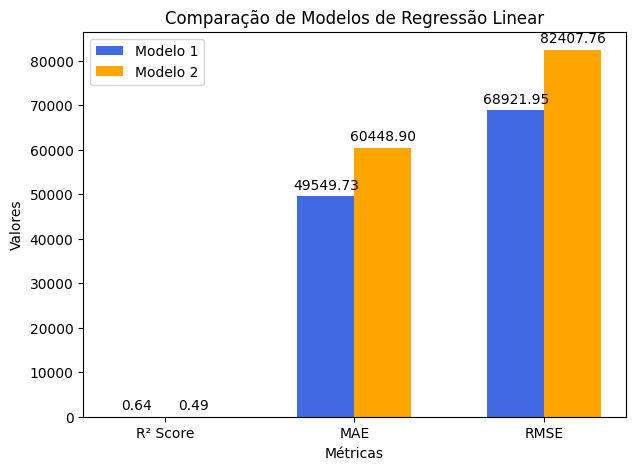

In [137]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['R² Score', 'MAE', 'RMSE']
valores_modelo1 = [0.6437, 49549.73, 68921.95]
valores_modelo2 = [0.4906, 60448.90, 82407.76]


x = np.arange(len(labels))  # Posições das barras
largura = 0.30  # Largura das barras

fig, ax = plt.subplots(figsize=(7, 5))

bars1 = ax.bar(x - largura/2, valores_modelo1, largura, label='Modelo 1', color='royalblue')
bars2 = ax.bar(x + largura/2, valores_modelo2, largura, label='Modelo 2', color='orange')

# Adicionando rótulos e título
ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_title('Comparação de Modelos de Regressão Linear')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Exibir valores acima das barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Pequeno deslocamento para cima
                    textcoords="offset points",
                    ha='center', va='bottom')

# Mostrar gráfico
plt.show()


In [138]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [140]:
y_pred_dtr = dtr.predict(X_test)

In [141]:
r2_dtr = r2_score(y_test, y_pred_dtr)
print(r2_dtr)

0.6034786302454023


In [142]:
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_dtr))

print(f"MAE: {mae_dtr}")
print(f"RMSE: {rmse_dtr}")

MAE: 46646.504360465115
RMSE: 72708.79456802129


Arvores de decisão podem se ajustar muito bem as dados de treino, capturando até ruídos, o que leva a overfitting e pior desempenho nos dados de teste. Como foi preciso manter os outliers, pode ser que a árvore de decisão não seja um bom modelo para treino deste problema. Isso pode explicar uma queda de desempenho com este modelo em relação à regressão linear. Além disso, Se não houver regularização adequada (ex.: max_depth, min_samples_split), a árvore pode se tornar excessivamente complexa. Podemos notar no gráfico abaixo os desempenhos de MAE dos dois modelos

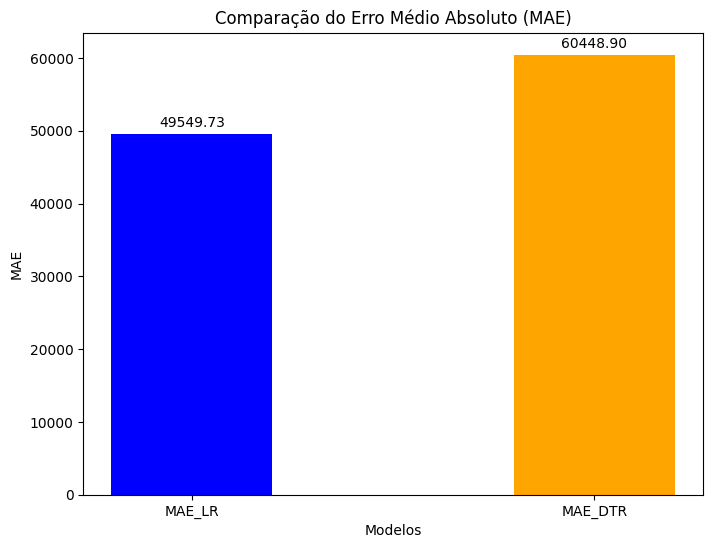

In [144]:
# Definição dos valores (substitua pelas variáveis reais)
mae_lr = 49549.73  # Exemplo de valor
mae_dtr = 60448.90  # Exemplo de valor

labels = ['MAE_LR', 'MAE_DTR']
valores = [mae_lr, mae_dtr]

# Configurando posições das barras
x = np.arange(len(labels))  # Posições no eixo X
largura = 0.4  # Largura das barras

fig, ax = plt.subplots(figsize=(8, 6))

# Criando o gráfico de barras
bars = ax.bar(x, valores, width=largura, color=['blue', 'orange'])

# Adicionando rótulos e título
ax.set_xlabel('Modelos')
ax.set_ylabel('MAE')
ax.set_title('Comparação do Erro Médio Absoluto (MAE)')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Exibir os valores acima das barras
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Pequeno deslocamento para cima
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar gráfico
plt.show()
